In [1]:
import numpy as np
from PIL import Image
import cv2
from scipy.signal import convolve2d

def load_image(image_path):
    img = Image.open(image_path)
    color_image = np.array(img)
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
    return color_image, grayscale_image

def apply_prewitt_operator(image):
    kernel_x = np.array([
        [-1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1]
    ], dtype=float)

    kernel_y = np.array([
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1]
    ], dtype=float)

    Gx = convolve2d(image, kernel_x, mode='same', boundary='symm')
    Gy = convolve2d(image, kernel_y, mode='same', boundary='symm')

    G = np.sqrt(Gx**2 + Gy**2)

    Gx = np.clip((Gx / np.max(np.abs(Gx))) * 255, 0, 255).astype(np.uint8)
    Gy = np.clip((Gy / np.max(np.abs(Gy))) * 255, 0, 255).astype(np.uint8)
    G = np.clip((G / np.max(G)) * 255, 0, 255).astype(np.uint8)

    return Gx, Gy, G

def save_images(images, paths):
    for image, path in zip(images, paths):
        img = Image.fromarray(image)
        img.save(path)

def main(image_path):
    color_image, grayscale_image = load_image(image_path)
    Gx, Gy, G = apply_prewitt_operator(grayscale_image)
    binary_G = (G > 50) * 255  # Порог подбирается опытным путем

    save_images([color_image, grayscale_image, Gx, Gy, G, binary_G.astype(np.uint8)], [
        'color_image.png', 'grayscale_image.png', 'Gx.png', 'Gy.png', 'G.png', 'binary_G.png'
    ])


ModuleNotFoundError: No module named 'scipy'

In [2]:
import numpy as np
from PIL import Image
import cv2
from scipy.signal import convolve2d
from IPython.display import display

In [3]:
def load_image(image_path):
    img = Image.open(image_path)
    color_image = np.array(img)
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
    return color_image, grayscale_image

In [4]:
def apply_prewitt_operator(image):
    kernel_x = np.array([
        [-1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1]
    ], dtype=float)
    kernel_y = np.array([
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1],
        [-1,  0,  0,  0,  1]
    ], dtype=float)

    Gx = convolve2d(image, kernel_x, mode='same', boundary='symm')
    Gy = convolve2d(image, kernel_y, mode='same', boundary='symm')
    G = np.sqrt(Gx**2 + Gy**2)
    return Gx, Gy, G



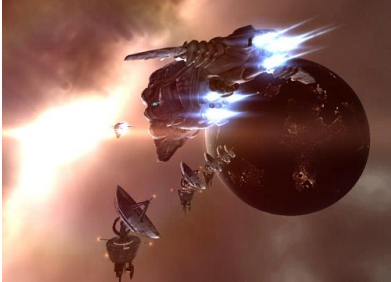

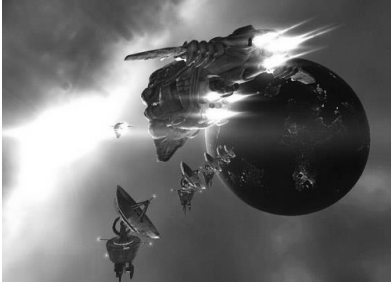

In [7]:
color_image, grayscale_image = load_image('inputOAVi_4_lab.png')
display(Image.fromarray(color_image))
display(Image.fromarray(grayscale_image))

In [8]:
Gx, Gy, G = apply_prewitt_operator(grayscale_image)

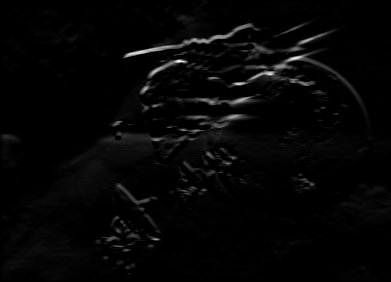

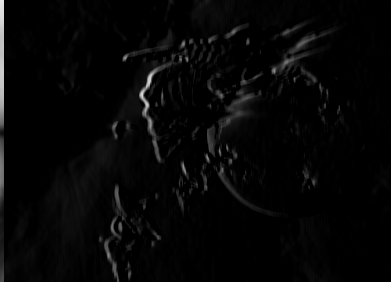

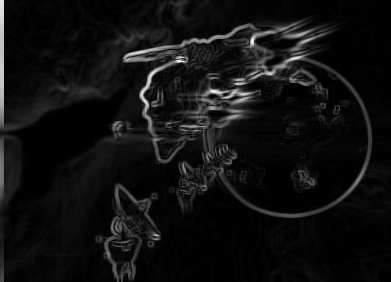

In [9]:
Gx_normalized = np.clip((Gx / np.max(np.abs(Gx))) * 255, 0, 255).astype(np.uint8)
Gy_normalized = np.clip((Gy / np.max(np.abs(Gy))) * 255, 0, 255).astype(np.uint8)
G_normalized = np.clip((G / np.max(G)) * 255, 0, 255).astype(np.uint8)

display(Image.fromarray(Gx_normalized))
display(Image.fromarray(Gy_normalized))
display(Image.fromarray(G_normalized))

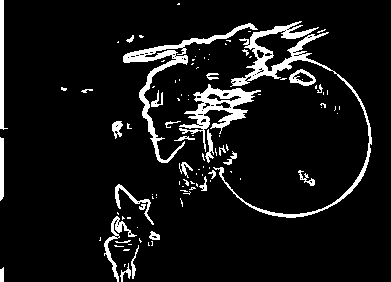

In [10]:
binary_G = (G_normalized > 50) * 255  # Порог подбирается опытным путем
binary_G = binary_G.astype(np.uint8)
display(Image.fromarray(binary_G))